In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json) :

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202531          7   5873        0   13316       9           0   
1     202530          7   7110     3586   10634      11           6   
2     202529          7   6385     3384    9386      10           6   
3     202528          7   5584     3123    8045       8           4   
4     202527          7   5667     2850    8484       8           4   
5     202526          7   5872     3285    8459       9           5   
6     202525          7   5953     3698    8208       9           6   
7     202524          7   4580     2558    6602       7           4   
8     202523          7   4911     2663    7159       7           4   
9     202522          7   6837     3940    9734      10           6   
10    202521          7   4693     2653    6733       7           4   
11    202520          7   3083     1535    4631       5           3   
12    202519          7   5084     1997    8171       8           3   
13    202518          7   5003     2718    7288       7           4   
14    202517          7   6246     3424    9068       9           5   
15    202516          7   6151     3193    9109       9           5   
16    202515          7   5557     3262    7852       8           5   
17    202514          7   4984     2858    7110       7           4   
18    202513          7   5964     3608    8320       9           5   
19    202512          7   3855     1995    5715       6           3   
20    202511          7   5878     2747    9009       9           4   
21    202510          7   2921     1421    4421       4           2   
22    202509          7   3381     1468    5294       5           2   
23    202508          7   2835     1286    4384       4           2   
24    202507          7   4502     2382    6622       7           4   
25    202506          7   3455     1958    4952       5           3   
26    202505          7   2087     1056    3118       3           1   
27    202504          7   6895     4466    9324      10           6   
28    202503          7   2462     1161    3763       4           2   
29    202502          7   5966     2757    9175       9           4   
...      ...        ...    ...      ...     ...     ...         ...   
1779  199126          7  17608    11304   23912      31          20   
1780  199125          7  16169    10700   21638      28          18   
1781  199124          7  16171    10071   22271      28          17   
1782  199123          7  11947     7671   16223      21          13   
1783  199122          7  15452     9953   20951      27          17   
1784  199121          7  14903     8975   20831      26          16   
1785  199120          7  19053    12742   25364      34          23   
1786  199119          7  16739    11246   22232      29          19   
1787  199118          7  21385    13882   28888      38          25   
1788  199117          7  13462     8877   18047      24          16   
1789  199116          7  14857    10068   19646      26          18   
1790  199115          7  13975     9781   18169      25          18   
1791  199114          7  12265     7684   16846      22          14   
1792  199113          7   9567     6041   13093      17          11   
1793  199112          7  10864     7331   14397      19          13   
1794  199111          7  15574    11184   19964      27          19   
1795  199110          7  16643    11372   21914      29          20   
1796  199109          7  13741     8780   18702      24          15   
1797  199108          7  13289     8813   17765      23          15   
1798  199107          7  12337     8077   16597      22          15   
1799  199106          7  10877     7013   14741      19          12   
1800  199105          7  10442     6544   14340      18          11   
1801  199104          7   7913     4563   11263      14           8   
1802  199103          7  15387    10484   20290      27          18   
1803  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data=raw_data

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index()

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

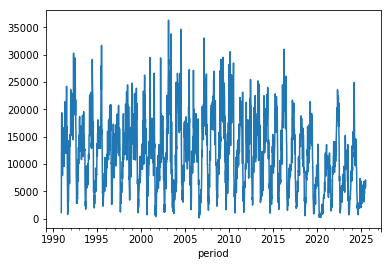

In [9]:
sorted_data['inc'].plot()

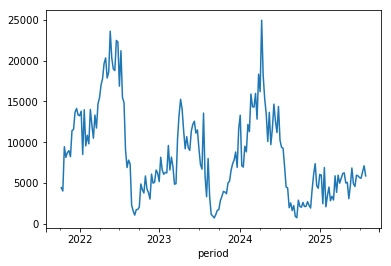

In [10]:
sorted_data['inc'][-200:].plot()

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

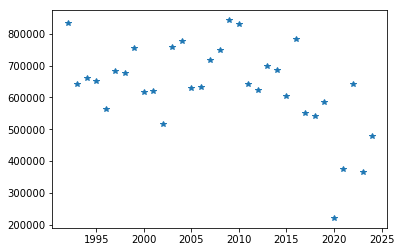

In [13]:
yearly_incidence.plot(style='*')

In [14]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64